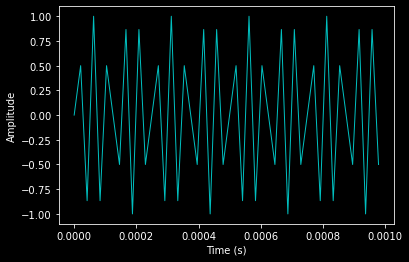

C:\Users\rowan\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


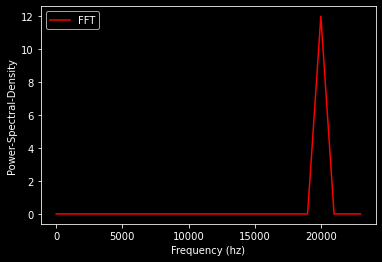

In [30]:
import numpy as np
import matplotlib.pyplot as plt

dt = 1/48000  #specify some change in time: 1 over sample rate
t = np.arange(0,0.001,dt)  #make an array with data for 1ms
fsum = np.sin(2 * np.pi * 20000 * t)  #fill array with amplitude data
fsumNoise =  fsum + 0*np.random.randn(len(t))  #add some random noise to the data

#plot the raw amplitude data
plt.style.use('dark_background')
plt.plot(t, fsumNoise, color = 'c', linewidth = 1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


n = len(t) 
fhat = np.fft.fft(fsumNoise) #apply fft to noisy data 
PSD = fhat * np.conj(fhat) / n  #calculate PSD using fft results
freq = (1/(dt*n)) * np.arange(n)  #make the frequency axis for ploting
#when working with real (not complex) numbers, the PSD result is mirrored
#we only want to plot the first half of the PSD
xaxis = np.arange(0,np.floor(n/2), dtype = 'int')  

#plot the fft results
plt.plot(freq[xaxis], PSD[xaxis], color = 'r', linewidth = 1.5, label = "FFT")
plt.xlabel('Frequency (hz)')
plt.ylabel('Power-Spectral-Density')
plt.legend()
plt.show()


In [23]:
#pulls out the frequencies above some threshold
fraw = []
for i in range(len(xaxis)):
    if PSD[i] > 10:  #define the threshold
        value = freq[i]
        fraw.append(value)  #add all valid frequencies to the list 
fraw  #show the list
        

[20000.0]

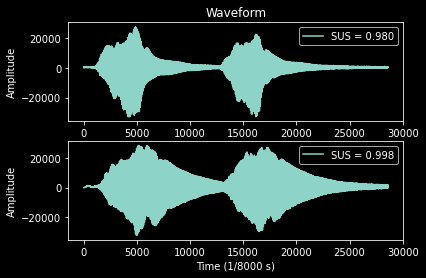

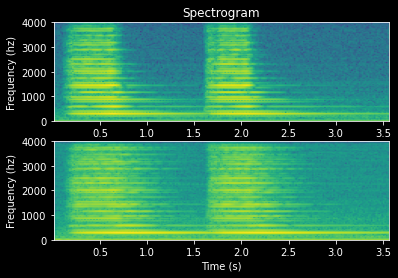

In [2]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

#source the two .wav files to compare
samplingFrequency1, signalData1 = wavfile.read('E:/Desktop/Netlogo Testing/violin.wav')
samplingFrequency2, signalData2 = wavfile.read('E:/Desktop/Netlogo Testing/violin-50-0.998.wav')

#plot the spectrogram
plt.style.use('dark_background')

plt.subplot(211)
plt.title('Waveform')
plt.plot(signalData1, label = "SUS = 0.980")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(212)
plt.plot(signalData2, label = "SUS = 0.998")
plt.xlabel("Time (1/8000 s)")
plt.ylabel('Amplitude')
plt.legend()

plt.show()

#plot the waveform
plt.subplot(211)
plt.title("Spectrogram")
plt.specgram(signalData1,Fs=samplingFrequency1)
plt.ylabel('Frequency (hz)')

plt.subplot(212)
plt.specgram(signalData2,Fs=samplingFrequency2)
plt.xlabel("Time (s)")
plt.ylabel('Frequency (hz)')

plt.show()
